Evaluating with Identity Activation:

Results with Identity Activation:
Accuracy: 0.876552
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     21995
           1       0.59      0.68      0.64      4097

    accuracy                           0.88     26092
   macro avg       0.77      0.80      0.78     26092
weighted avg       0.88      0.88      0.88     26092



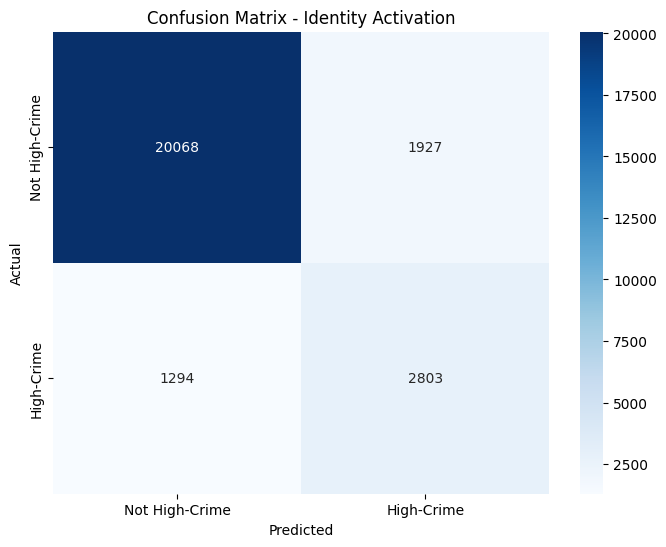

Evaluating with Logistic Activation:

Results with Logistic Activation:
Accuracy: 0.879657
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     21995
           1       0.61      0.66      0.63      4097

    accuracy                           0.88     26092
   macro avg       0.77      0.79      0.78     26092
weighted avg       0.88      0.88      0.88     26092



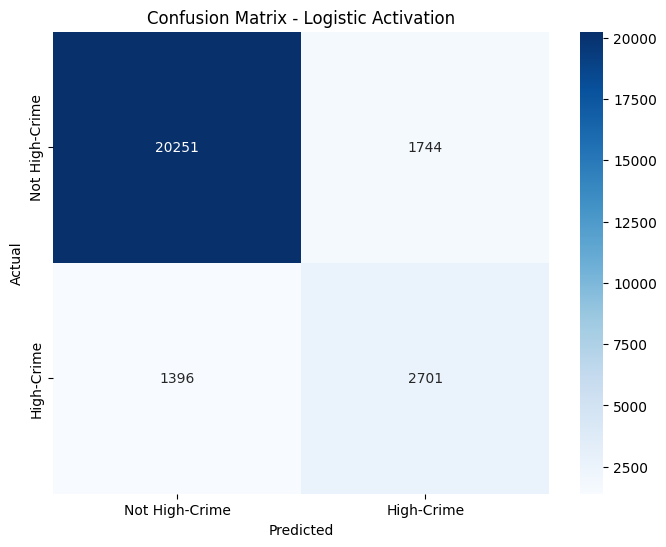

Evaluating with Tanh Activation:

Results with Tanh Activation:
Accuracy: 0.878009
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     21995
           1       0.60      0.67      0.63      4097

    accuracy                           0.88     26092
   macro avg       0.77      0.79      0.78     26092
weighted avg       0.88      0.88      0.88     26092



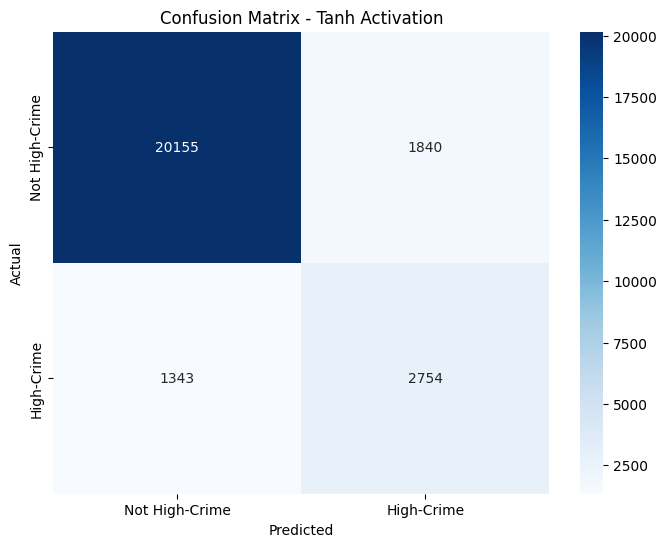

Evaluating with Relu Activation:

Results with Relu Activation:
Accuracy: 0.888510
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     21995
           1       0.63      0.70      0.66      4097

    accuracy                           0.89     26092
   macro avg       0.79      0.81      0.80     26092
weighted avg       0.89      0.89      0.89     26092



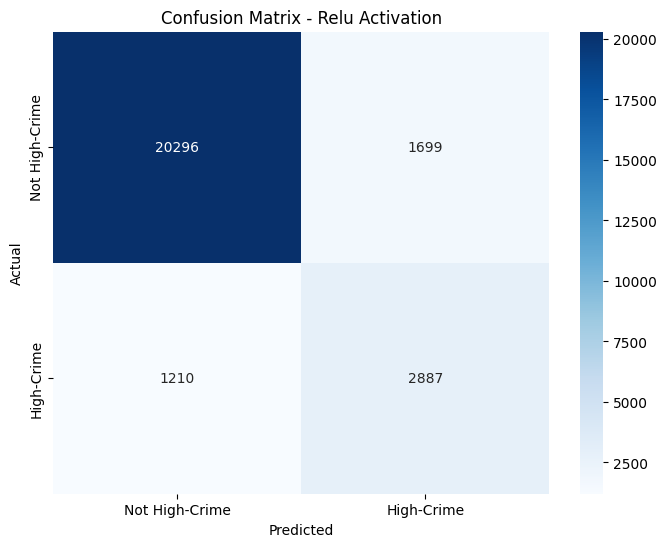

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
file_path = 'preprocessed_crime_data.csv'
df = pd.read_csv(file_path)

# Convert 'DATE OCC' to datetime and extract 'month' and 'year'
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['month'] = df['DATE OCC'].dt.month
df['year'] = df['DATE OCC'].dt.year

# Drop 'DATE OCC' because it’s no longer needed
df = df.drop(columns=['DATE OCC'])

# Split data into training (2020-2022) and testing (2023-2024) sets
train_df = df[df['year'].isin([2020, 2021, 2022])]
test_df = df[df['year'].isin([2023, 2024])]

# Define features and target
X_train = train_df.drop(columns=['Target', 'year', 'Crime Count', 'Is Violent'])
y_train = train_df['Target']
X_test = test_df.drop(columns=['Target', 'year', 'Crime Count', 'Is Violent'])
y_test = test_df['Target']

# Function to train and evaluate the MLP model
def train_and_evaluate(activation_function):
    random_seed = np.random.randint(0, 10000)
    mlp = MLPClassifier(
    hidden_layer_sizes=(300,300,200),
    activation=activation_function,
    max_iter=500,
    solver='adam',
    random_state=random_seed,
    early_stopping=True,
    n_iter_no_change=15
    )
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    # Calculate and display metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nResults with {activation_function.capitalize()} Activation:")
    print(f"Accuracy: {accuracy:.6f}")
    print("Classification Report:")
    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Not High-Crime', 'High-Crime'],
        yticklabels=['Not High-Crime', 'High-Crime']
    )
    plt.title(f'Confusion Matrix - {activation_function.capitalize()} Activation')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Test different activation functions
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
for func in activation_functions:
    print(f"Evaluating with {func.capitalize()} Activation:")
    train_and_evaluate(func)